In [15]:
import itertools
import numpy as np
import qiskit
from qiskit import QuantumCircuit,QuantumRegister


# Grover's algorithm applied to a satisfiability problem
 
 The 3-SAT problem is a well known NP-complete problem. It consists in looking for vectors : $$(x_0, . . . , x_{n-1}) \in \{0, 1\}^n$$
satisfying a given predicate f in the form of a conjunction of clauses
which are all 3-disjunctions.

### answer 0 :

We condider the the predicate f defined as : 
$$f(x_0,x_1,x_2,x_3,x_4) = (\overline{x_0}\cup x_1)\cap(x_0\cup x_1 \cup \overline{x_2})\cap(x_2\cup x_3)\cap(\overline{x_1}\cup\overline{x_2}\cup x_3)\cap(\overline{x_3}\cup \overline{x_4})\cap(\overline{x_2}\cup \overline{x_3}\cup x_4)$$
There are 3 possible solutions :
$$v_1 = (0, 0, 0, 1, 0)\qquad v_2 = (0, 1, 0, 1, 0) \qquad v_3 = (1, 1, 0, 1, 0)$$

We get this through this code:

In [16]:
def compute(n, expr):
    combinations = list(itertools.product([0, 1], repeat=n))
    
    matrix = np.array(combinations)
    res = [expr(x) for x in matrix]
    print([matrix[x] for x in range(np.power(2,n)) if res[x] == True])

In [17]:
def custom_expression(x):
    return (
        (not x[0] or x[1]) and
        (x[0] or x[1] or not x[2]) and
        (x[2] or x[3]) and
        (not x[1] or not x[2] or x[3]) and
        (not x[3] or not x[4]) and
        (not x[2] or not x[3] or x[4])
    )
compute(5, custom_expression)

[array([0, 0, 0, 1, 0]), array([0, 1, 0, 1, 0]), array([1, 1, 0, 1, 0])]


### answer 1 :

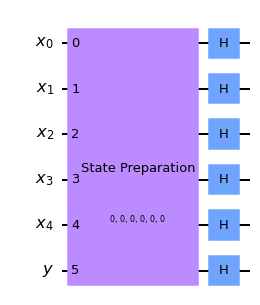

In [20]:
f_in = QuantumRegister(5, name='x')
y = QuantumRegister(1, name='y')

circ = QuantumCircuit(f_in, y)
circ.prepare_state('000000', circ.qubits)

for i in range(6):
    circ.h(i)
circ.draw('mpl')

### answer 2 :